# **Multi-Class Classification**

**Customer Segmentation**

# **Eksplorasi Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?id=1Op0oYcIa1b5F66tP1QrDnTcrmPPQ-UTE', delimiter =';')
dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


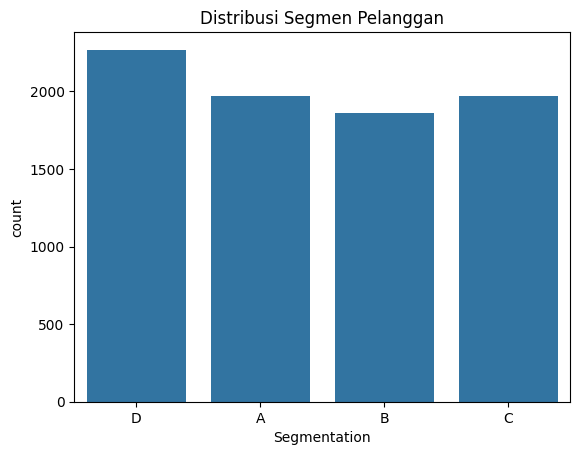

In [ ]:
# Memeriksa Distribusi Target
target_column = 'Segmentation'
sns.countplot(x=target_column, data=dataset)
plt.title('Distribusi Segmen Pelanggan')
plt.show()

In [ ]:
# Menampilkan jumlah setiap segmen
segment_counts = dataset[target_column].value_counts()

# Menampilkan hasil
print(segment_counts)


Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


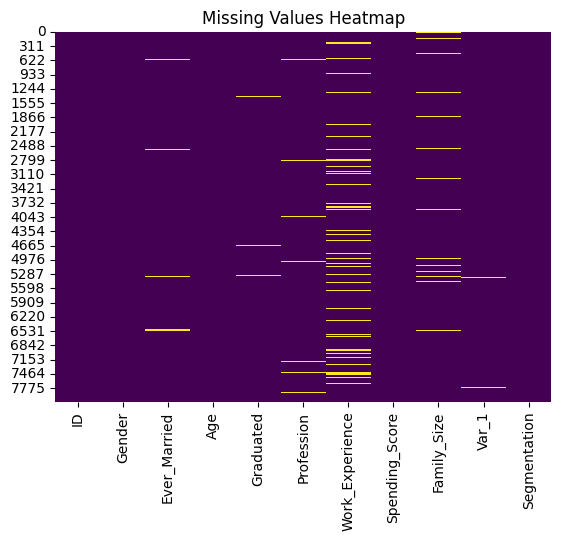

In [ ]:
# Memeriksa Missing Values
print(dataset.isnull().sum())

sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Pemeriksaan Fitur Kategorikal
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Kolom Kategorikal:", categorical_columns)

for col in categorical_columns:
    print(f"{col}: {dataset[col].unique()}")


Kolom Kategorikal: Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')
Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes' nan]
Graduated: ['No' 'Yes' nan]
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score: ['Low' 'Average' 'High']
Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation: ['D' 'A' 'B' 'C']


Kolom Numerik: Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


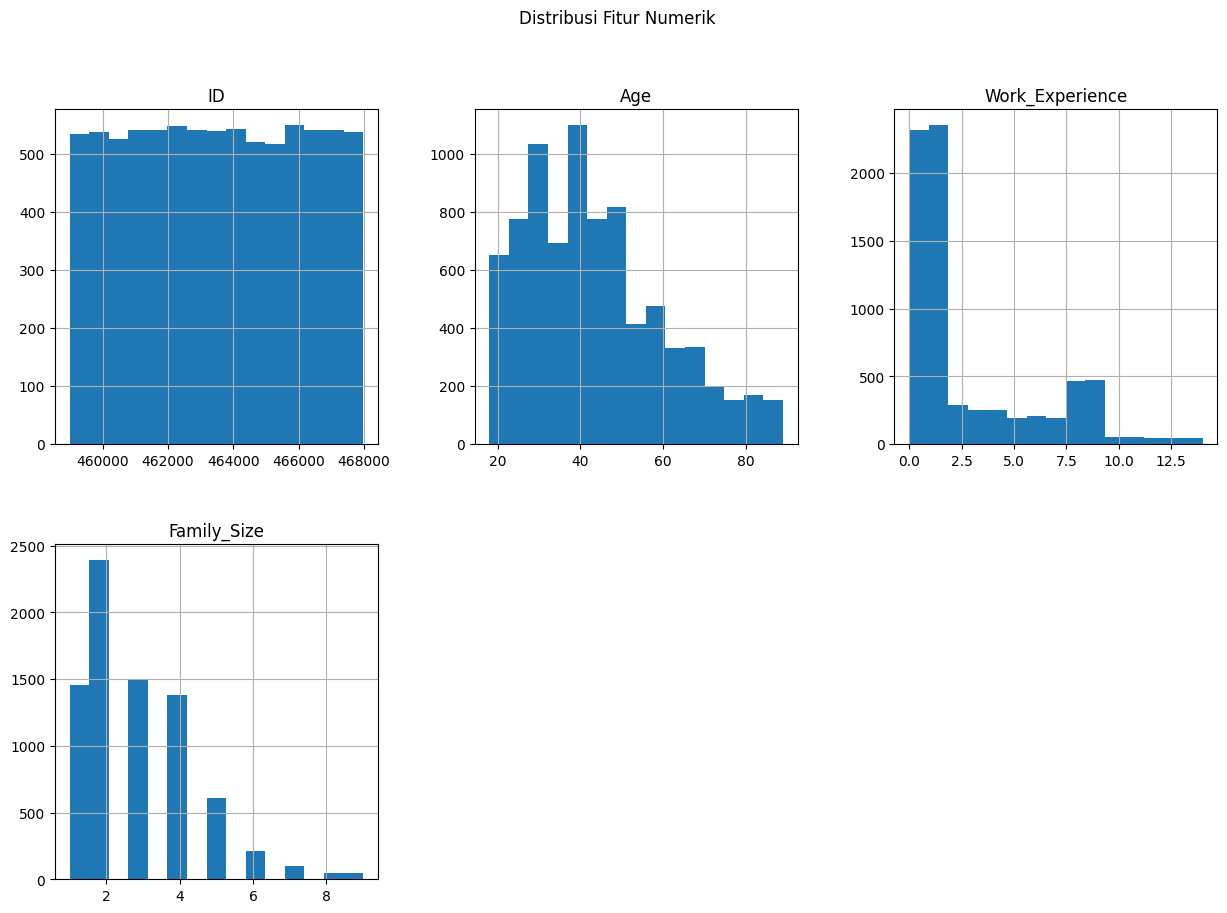

In [ ]:
# Pemeriksaan Fitur Numerik
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
print("Kolom Numerik:", numerical_columns)

dataset[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribusi Fitur Numerik')
plt.show()


# **Preprocessing**

In [ ]:
# Membuang Data ID
df = dataset.drop(columns=['ID'])
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
# Drop data yang null
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
 9   Segmentation     6665 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 572.8+ KB


*Sampling*

In [ ]:
# Jumlah sampel per kelas
n_samples_per_class = 500

# Pengambilan sampel berdasarkan kelas di kolom Segmentasi
df_sampled = df.groupby('Segmentation', group_keys=False).apply(
    lambda x: x.sample(n=n_samples_per_class, random_state=42)
).reset_index(drop=True)

print(df_sampled['Segmentation'].value_counts())


Segmentation
A    500
B    500
C    500
D    500
Name: count, dtype: int64


<ipython-input-40-48723df8930b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Segmentation', group_keys=False).apply(


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengubah Categorical Features ke Numeric
for column in df_sampled.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_sampled[column] = le.fit_transform(df_sampled[column])

df_sampled

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,51,1,0,8.0,2,5.0,5,0
1,1,1,41,1,3,5.0,2,1.0,5,0
2,1,1,39,1,5,7.0,0,5.0,2,0
3,1,1,28,0,0,1.0,0,2.0,2,0
4,0,0,40,1,1,7.0,2,1.0,5,0
...,...,...,...,...,...,...,...,...,...,...
1995,1,1,83,0,7,0.0,2,1.0,5,3
1996,1,0,22,0,1,8.0,2,3.0,5,3
1997,0,0,29,0,5,0.0,2,3.0,5,3
1998,1,0,33,1,0,0.0,2,1.0,5,3


In [ ]:
df_sampled_corr = df_sampled.corr()
df_sampled_corr

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.100602,0.011018,-0.049947,0.024651,-0.048786,-0.035026,0.031232,0.026501,0.062508
Ever_Married,0.100602,1.000000,0.563795,0.202193,-0.118932,-0.100155,-0.643084,-0.066632,0.119320,-0.188173
Age,0.011018,0.563795,1.000000,0.243871,0.028180,-0.194495,-0.302743,-0.278401,0.188840,-0.223384
Graduated,-0.049947,0.202193,0.243871,1.000000,-0.315242,0.017738,-0.153321,-0.219399,0.139273,-0.159033
Profession,0.024651,-0.118932,0.028180,-0.315242,1.000000,-0.062643,0.214587,0.156416,-0.054246,0.194982
Work_Experience,-0.048786,-0.100155,-0.194495,0.017738,-0.062643,1.000000,0.070806,-0.065414,0.018794,0.002488
Spending_Score,-0.035026,-0.643084,-0.302743,-0.153321,0.214587,0.070806,1.000000,-0.100106,-0.035821,0.078719
Family_Size,0.031232,-0.066632,-0.278401,-0.219399,0.156416,-0.065414,-0.100106,1.000000,-0.173207,0.183006
Var_1,0.026501,0.119320,0.188840,0.139273,-0.054246,0.018794,-0.035821,-0.173207,1.000000,-0.024957
Segmentation,0.062508,-0.188173,-0.223384,-0.159033,0.194982,0.002488,0.078719,0.183006,-0.024957,1.000000


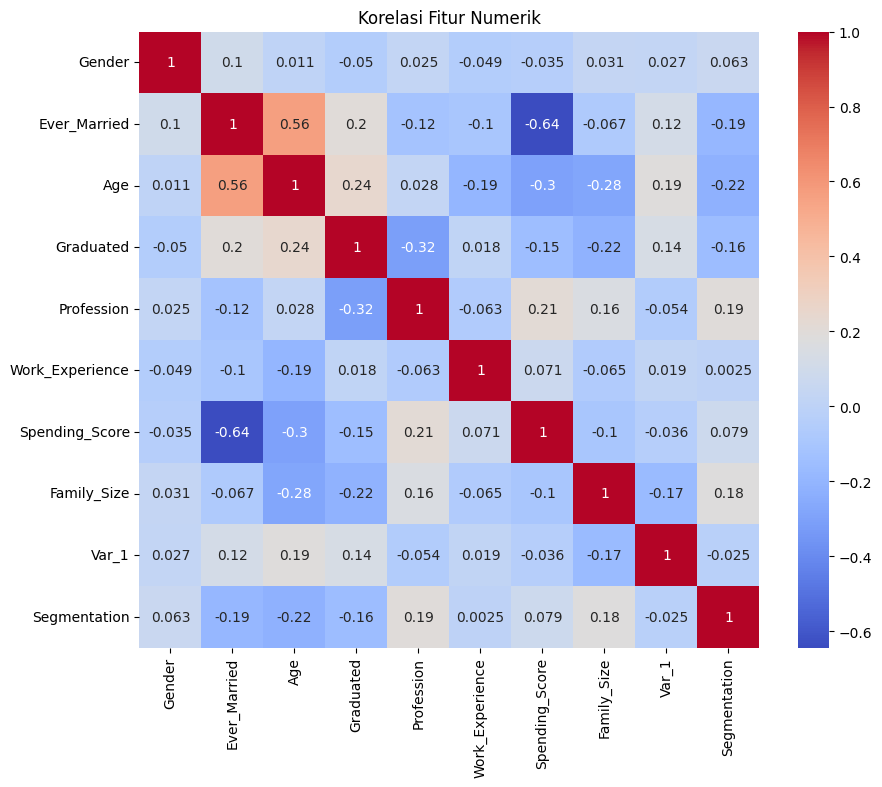

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sampled_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

<Axes: >

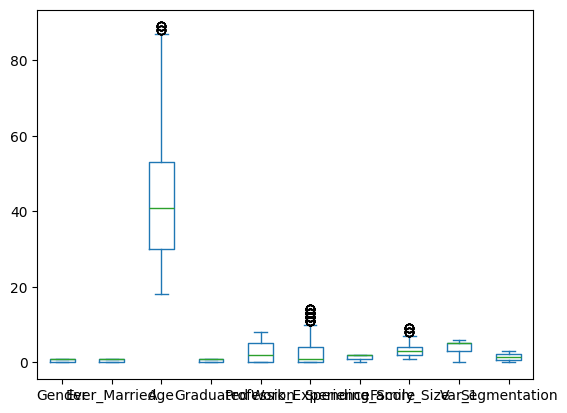

In [ ]:
df_sampled.plot(kind='box')

In [ ]:
df_cleaned = df_sampled.copy()
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,51,1,0,8.0,2,5.0,5,0
1,1,1,41,1,3,5.0,2,1.0,5,0
2,1,1,39,1,5,7.0,0,5.0,2,0
3,1,1,28,0,0,1.0,0,2.0,2,0
4,0,0,40,1,1,7.0,2,1.0,5,0


In [ ]:
def handle_outliers_iqr(df_cleaned, column):
    # Hitung Q1, Q3, dan IQR
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Hitung batas bawah dan batas atas
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Print informasi
    print(f"Column '{column}': Q1={Q1}, Q3={Q3}, IQR={IQR}")
    print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")

    # Lakukan capping
    df_cleaned[column] = df_cleaned[column].clip(lower=lower_limit, upper=upper_limit)

    # Print tipe data setelah capping
    print(f"Column '{column}' after handling outliers: {df_cleaned[column].dtypes}")
    return df_cleaned

# Terapkan metode IQR untuk kolom tertentu
df_cleaned = handle_outliers_iqr(df_cleaned, 'Age')
df_cleaned = handle_outliers_iqr(df_cleaned, 'Work_Experience')
df_cleaned = handle_outliers_iqr(df_cleaned, 'Family_Size')


Column 'Age': Q1=30.0, Q3=53.0, IQR=23.0
Lower limit: -4.5, Upper limit: 87.5
Column 'Age' after handling outliers: float64
Column 'Work_Experience': Q1=0.0, Q3=4.0, IQR=4.0
Lower limit: -6.0, Upper limit: 10.0
Column 'Work_Experience' after handling outliers: float64
Column 'Family_Size': Q1=2.0, Q3=4.0, IQR=2.0
Lower limit: -1.0, Upper limit: 7.0
Column 'Family_Size' after handling outliers: float64


In [ ]:
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,51.0,1,0,8.0,2,5.0,5,0
1,1,1,41.0,1,3,5.0,2,1.0,5,0
2,1,1,39.0,1,5,7.0,0,5.0,2,0
3,1,1,28.0,0,0,1.0,0,2.0,2,0
4,0,0,40.0,1,1,7.0,2,1.0,5,0


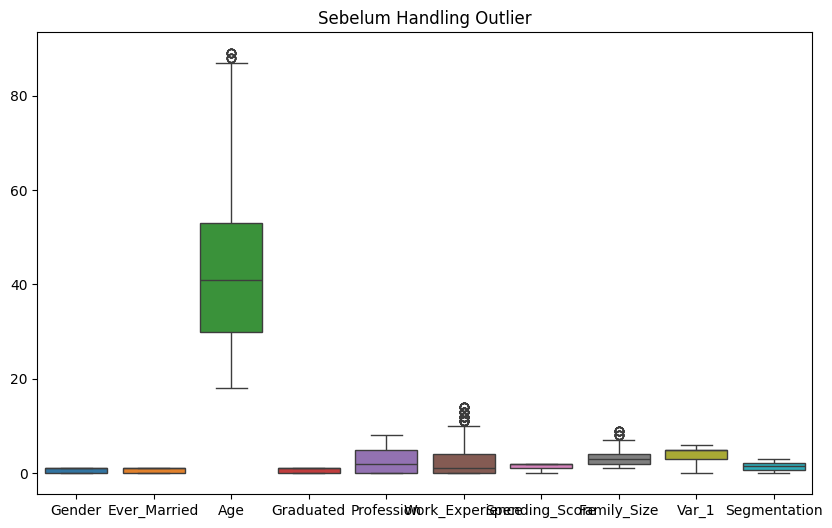

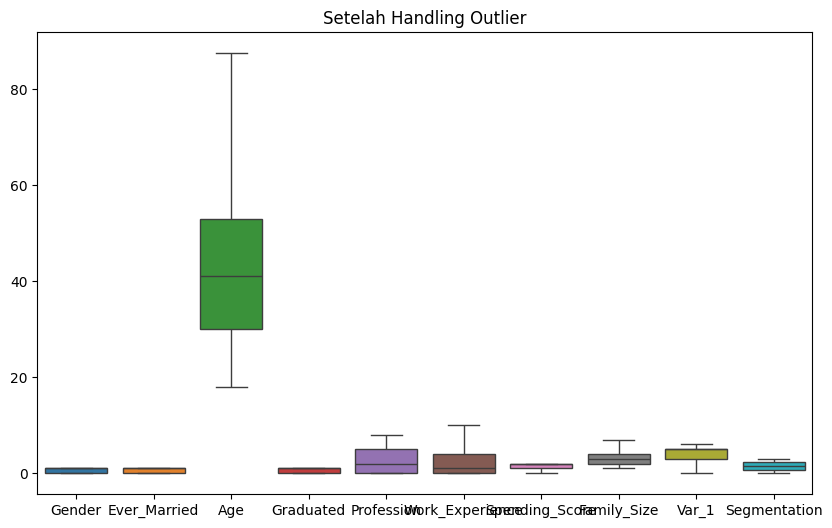

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi sebelum
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sampled)
plt.title('Sebelum Handling Outlier')
plt.show()

# Visualisasi sesudah
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Setelah Handling Outlier')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur untuk PCA
feature_to_pca = ['Ever_Married', 'Age']

# Ekstrak fitur untuk PCA
X_pca = df_cleaned[feature_to_pca]

# Normalisasi data untuk PCA
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_pca)

# Terapkan PCA
pca = PCA(n_components=1)
X_pca_reduced = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Tambahkan hasil PCA ke DataFrame
df_pca = pd.DataFrame(X_pca_reduced, columns=['PCA_Component'], index=df_cleaned.index)

# Pisahkan target (y)
y = df_cleaned['Segmentation'].values

# Hapus target dan fitur yang sudah diubah ke PCA
df_cleaned = df_cleaned.drop(columns=feature_to_pca + ['Segmentation'])

# Gabungkan kembali DataFrame dengan hasil PCA
df_combined = pd.concat([df_cleaned, df_pca], axis=1)

# Normalisasi data untuk model
scaler = MinMaxScaler()
X = scaler.fit_transform(df_combined.values)

# Cek dimensi hasil
print("Shape of feature matrix X:", X.shape)
print("Shape of target array y:", y.shape)

Explained variance ratio: [0.88264303]
Shape of feature matrix X: (2000, 8)
Shape of target array y: (2000,)


<Axes: >

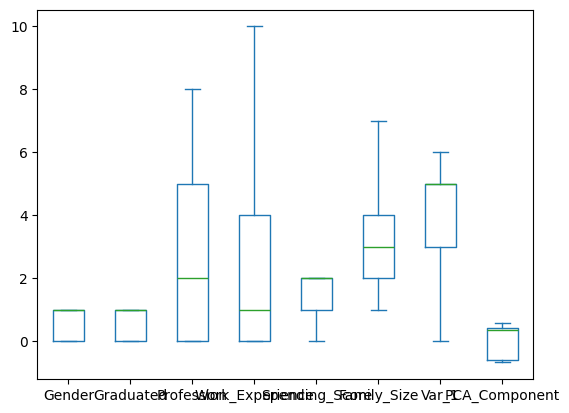

In [ ]:
df_combined.plot(kind='box')

# **Pembagian Data**

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi data ke dalam data pelatihan dan data pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=42)

# **Training Model**

Training KNN with 5-Fold Cross Validation...
KNN - Average Accuracy: 0.4350
KNN - Accuracy per Fold: [0.4      0.4375   0.421875 0.44375  0.471875]
KNN - Average F1-Score: 0.4376
KNN - Confusion Matrix:
[[165 119  46  66]
 [131 133 105  36]
 [ 78  93 196  45]
 [ 99  50  36 202]]
------------------------------------------------------------


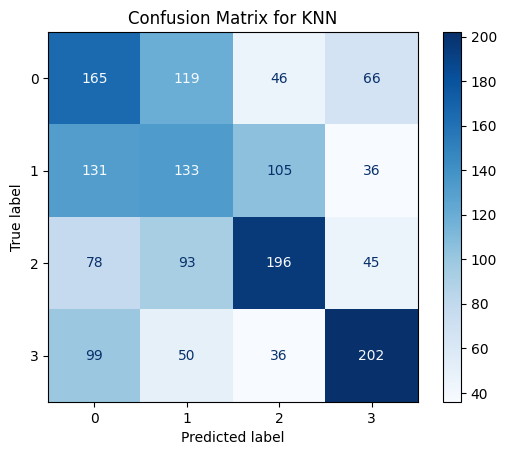

Training RandomForest with 5-Fold Cross Validation...
RandomForest - Average Accuracy: 0.4631
RandomForest - Accuracy per Fold: [0.465625 0.465625 0.44375  0.4375   0.503125]
RandomForest - Average F1-Score: 0.4624
RandomForest - Confusion Matrix:
[[147 100  58  91]
 [ 99 148 127  31]
 [ 63 109 207  33]
 [ 86  34  28 239]]
------------------------------------------------------------


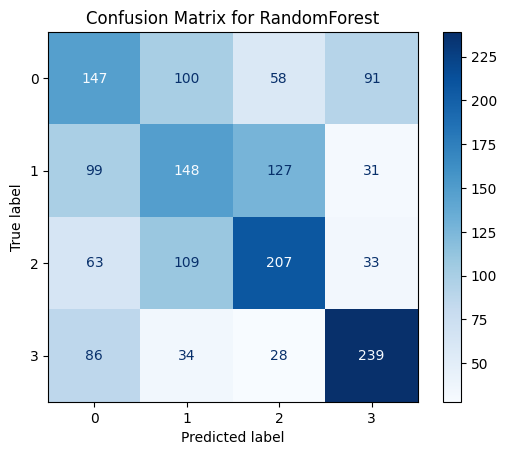

Training SVM with 5-Fold Cross Validation...
SVM - Average Accuracy: 0.4738
SVM - Accuracy per Fold: [0.48125 0.45    0.49375 0.46875 0.475  ]
SVM - Average F1-Score: 0.4701
SVM - Confusion Matrix:
[[134 137  54  71]
 [ 71 156 128  50]
 [ 35  94 222  61]
 [ 90  43   8 246]]
------------------------------------------------------------


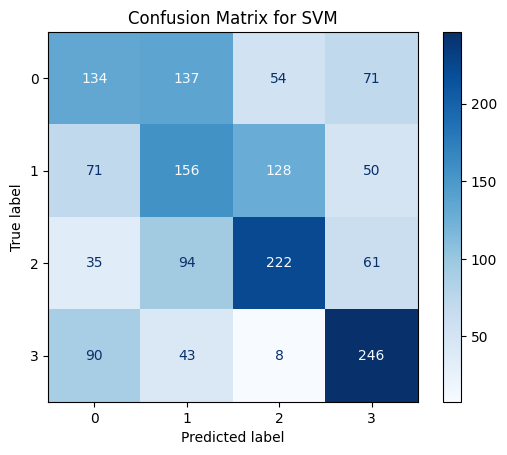


The best model is SVM.


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Inisialisasi model-model
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Menyimpan model terbaik
best_model_name = None
best_model = None
best_score = -np.inf

# Jumlah folds
k = 5

# Lakukan K-Fold Cross Validation untuk setiap model
for model_name, model in models.items():
    print(f"Training {model_name} with {k}-Fold Cross Validation...")

    # Lakukan cross-validation untuk accuracy
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')

    # Lakukan cross-validation untuk F1-score
    f1_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='f1_weighted')

    # Simpan prediksi cross-validation
    y_pred = cross_val_predict(model, X_train, y_train, cv=k)

    # Hitung confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)

    avg_accuracy = np.mean(accuracy_scores)
    avg_f1 = np.mean(f1_scores)

    if avg_f1 > best_score:
        best_score = avg_f1
        best_model_name = model_name
        best_model = model

    # Menampilkan metrik evaluasi
    print(f"{model_name} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"{model_name} - Accuracy per Fold: {accuracy_scores}")
    print(f"{model_name} - Average F1-Score: {avg_f1:.4f}")
    print(f"{model_name} - Confusion Matrix:\n{conf_matrix}")
    print("-" * 60)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Menampilkan model terbaik
print(f"\nThe best model is {best_model_name}.")


# **Hyperparameter Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mendefinisilan grid hyperparameter untuk Grid Search berdasarkan model terbaik
if best_model_name == 'KNN':
    param_grid = {
        'n_neighbors': [3, 5, 7, 10],
        'metric': ['euclidean', 'manhattan', 'chebyshev']
    }
elif best_model_name == 'RandomForest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['auto', 'sqrt', 'log2']
    }
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['linear', 'rbf', 'poly']
    }

# Melakukan Grid Search dengan Cross-Validation
print(f"Performing Grid Search for {best_model_name}...")
grid_search = GridSearchCV(best_model, param_grid, cv=k, scoring='f1_weighted', verbose=3)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik and score-nya
print(f"Best hyperparameters for {best_model_name}: {grid_search.best_params_}")
print(f"Best F1-Score: {grid_search.best_score_:.4f}")

Performing Grid Search for SVM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.403 total time=   0.3s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.447 total time=   0.3s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.458 total time=   0.3s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.442 total time=   0.3s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.451 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.381 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.410 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.388 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.391 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.418 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.457 total time=   0.4s
[CV 2/5] END 

# **Pengujian Model**

Test F1-Score: 0.4576
Test Accuracy: 0.4625
Confusion Matrix:
[[45 26 10 23]
 [29 22 28 16]
 [ 8 21 48 11]
 [27 12  4 70]]


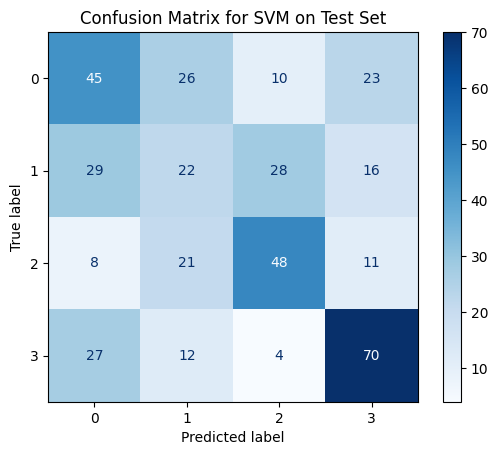

In [ ]:
# Melakukan pengujian model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Evaluasi hasil data pengujian
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test F1-Score: {test_f1_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot confusion matrix untuk data pengujian
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for {best_model_name} on Test Set")
plt.show()

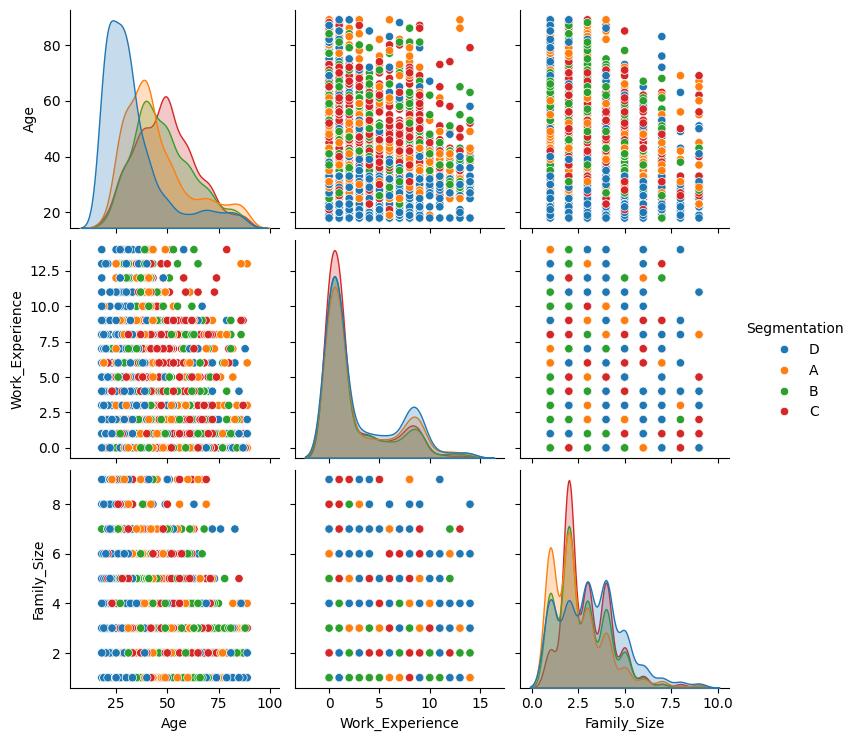

In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?id=1Op0oYcIa1b5F66tP1QrDnTcrmPPQ-UTE', delimiter =';')
temp = dataset.drop(columns=['ID'])
sns.pairplot(temp, hue='Segmentation')
plt.show()